# 2. Data Analysis

In [2]:
# The aim of this script is to create a dataset with the following information:
#   - Name of the article
#   - Content of the article
#   - Category of the article

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
# alt.renderers.enable("notebook")
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_path = 'Data/News_dataset.csv'
df = pd.read_csv(df_path,sep=';')
df.head()

,File_Name,Category,Content
0,Data/bbc/business/001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...
1,Data/bbc/business/002.txt,business,Dollar gains on Greenspan speech\n\nThe dollar...
2,Data/bbc/business/003.txt,business,Yukos unit buyer faces loan claim\n\nThe owner...
3,Data/bbc/business/004.txt,business,High fuel prices hit BA's profits\n\nBritish A...
4,Data/bbc/business/005.txt,business,Pernod takeover talk lifts Domecq\n\nShares in...


In [4]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

**Catatan:** Grafik di atas menandakan bahwa proporsi jumlah artikel pada setiap category bisa dikatakan "balance".

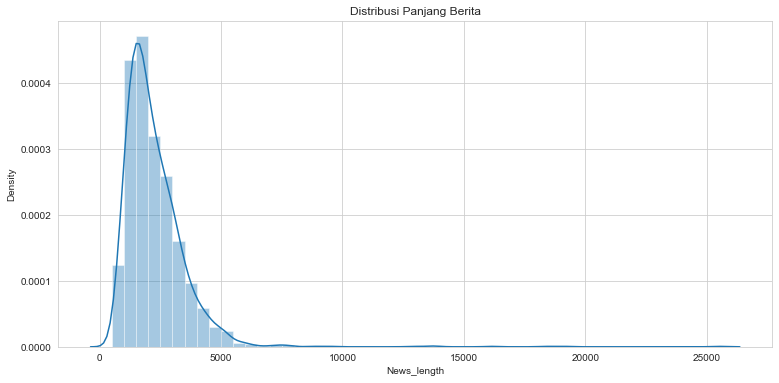

In [5]:
df['News_length'] = df['Content'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('Distribusi Panjang Berita');

**Catatan:** Terlihat bahwa distribusi panjang konten berita terlihat "skewed". Ada "sedikit" artikel dengan panjang yang jauh lebih besar dibandingkan rata-rata panjang artikel.

In [6]:
df['News_length'].describe()

count     2225.000000
mean      2265.160000
std       1364.094636
min        503.000000
25%       1448.000000
50%       1967.000000
75%       2804.000000
max      25485.000000
Name: News_length, dtype: float64

In [7]:
len(df)

2225

In [8]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]
len(df_95)

2113

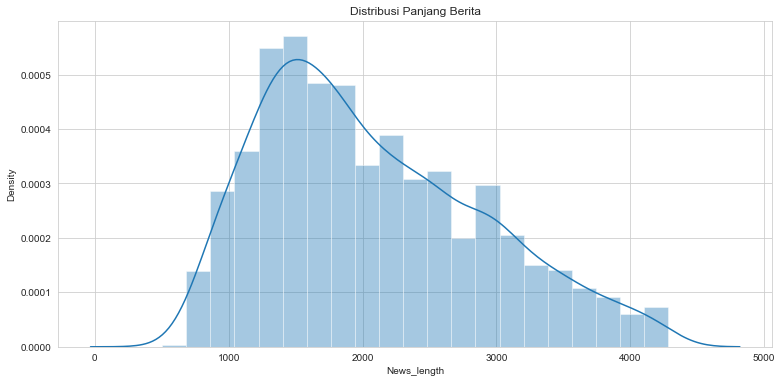

In [9]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('Distribusi Panjang Berita');

In [10]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

7

In [11]:
df_more10k['Content'].iloc[0]

'Scissor Sisters triumph at Brits\n\nUS band Scissor Sisters led the winners at the UK music industry\'s Brit Awards, walking off with three prizes. The flamboyant act scored a hat-trick in the international categories, winning the best group, best album and best newcomer awards. Glasgow group Franz Ferdinand won two prizes, as did Keane and Joss Stone, who was voted best urban act by digital TV viewers. Robbie Williams\' Angels was named the best song of the past 25 years. Scissor Sisters frontwoman Ana Matronic collected the best international album prize from singer Siouxsie Sioux. She told the audience: "If you told us a year ago we would be getting these awards today we would have called you crazy. You guys made our dream come true."\n\nThe band - whose self-titled LP was 2004\'s biggest-selling album - thanked "all the members of the sisterhood", adding: "We wouldn\'t be here without you." The US band, who opened the show with Take Your Mama, won the best international act and ne

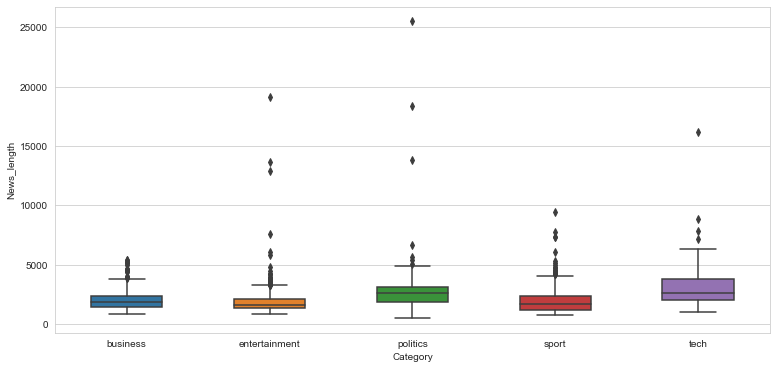

In [12]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

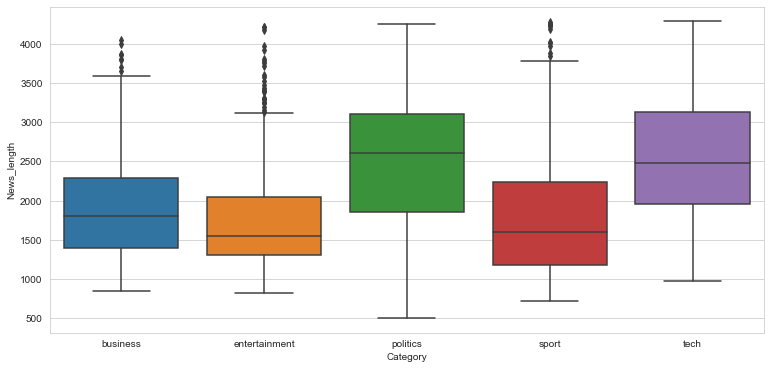

In [13]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

**Catatan:** Walaupun kita lihat bahwa grafid dari df_95 lebih baik tanpa outliers, namun kali ini kita akan gunakan semua data untuk menguji sistem yang akan kita buat.

In [14]:
with open('Data/News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)